#LAB 3 MODELOS DE MACHINE LEARNING - REGRESION LINEAL

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/lalvarenga90/Dataset-para-AI/main/COVID-19%20Global%20Statistics%20Dataset.csv')
df.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,"111,367,209",NaN,"1,199,031",NaN,"109,053,249",NaN,"1,114,929","1,771","332,633","3,581","1,186,742,917","3,544,577","334,805,269"
1,India,"45,028,429",161,"533,475",2.0,NaN,NaN,NaN,NaN,"32,012",379,"935,879,495","665,334","1,406,631,776"
2,France,"40,138,560",NaN,"167,642",NaN,"39,970,918",NaN,0,NaN,"612,013","2,556","271,490,188","4,139,547","65,584,518"
3,Germany,"38,819,284",574,"182,439",28.0,"38,240,600",NaN,"396,245",NaN,"462,776","2,175","122,332,384","1,458,359","83,883,596"
4,Brazil,"38,407,327",NaN,"709,765",NaN,"36,249,161",NaN,"1,448,401",NaN,"178,345","3,296","63,776,166","296,146","215,353,593"


In [5]:
# PROCESAMOS LOS DATOS
# Revisar nombres de columnas y elegir las relevantes
print(df.columns)

# Eliminar comas de los números y convertir a tipo numérico
df = df.replace({',': ''}, regex=True)
selected_columns = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases']
df[selected_columns] = df[selected_columns].apply(pd.to_numeric)

# Seleccionar columnas relevantes para el modelo (esto es solo un ejemplo, ajusta según el dataset)
df = df[selected_columns]

# Manejo de valores nulos
df = df.dropna()

# Asumiendo que queremos predecir 'ActiveCases' usando 'TotalCases', 'TotalDeaths' y 'TotalRecovered'
X = df[['Total Cases', 'Total Deaths', 'Total Recovered']]
y = df['Active Cases']

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Index(['Country', 'Total Cases', 'New Cases', 'Total Deaths', 'New Deaths',
       'Total Recovered', 'New Recovered', 'Active Cases', 'Serious, Critical',
       'Tot Cases/1M pop', 'Deaths/1M pop', 'Total Tests', 'Tests/1M pop',
       'Population'],
      dtype='object')


# ENTRENAMOS EL MODELO

In [6]:
reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

# EVALUAMOS EL MODELO

In [7]:
y_pred = reg.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 6.021440120597011e-18
R^2 Score: 1.0


# VISUALIZAMOS EL RESULTADO


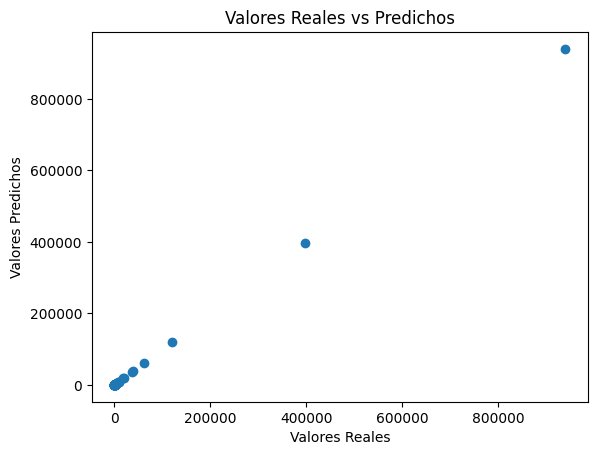

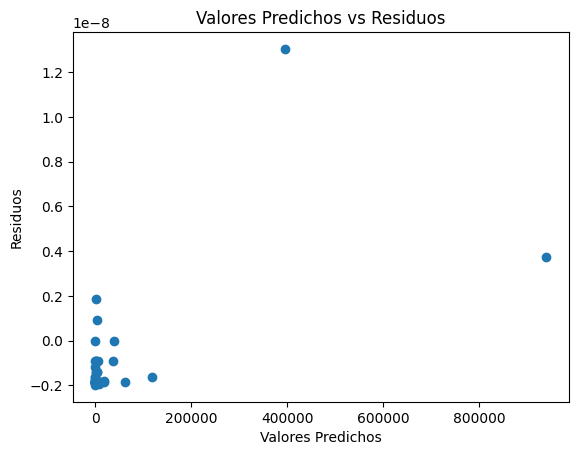

In [8]:
# Comparar valores reales vs predichos
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Valores Reales vs Predichos")
plt.show()

# Visualizar los residuos
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.title("Valores Predichos vs Residuos")
plt.show()
